In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb; snb.set()
from keras.datasets import mnist

Using TensorFlow backend.


# MNIST numbers

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

def sample_tox(x,y):
    nmax = x.shape[0]
    num_classes = y.shape[0]
    img_width = img_height = x_train[0].shape[0]
    x_vec = x.reshape(x.shape[0], img_width*img_height)[0:nmax,]/255
    dummies=pd.get_dummies(y).to_numpy()
    return(x_vec,dummies)

n_train , n_test = 1000, 100
x_train, y_train = X_train[:n_train,:,:] , Y_train[:n_train]
x_test, y_test =  X_test[:n_test,:,:] , Y_test[:n_test]
x_tra, y_tra=sample_tox(x_train,y_train)
x_te, y_te=sample_tox(x_test,y_test)
print(np.shape(x_tra),np.shape(x_te),np.shape(y_tra),np.shape(y_te))

(1000, 784) (100, 784) (1000, 10) (100, 10)


In [4]:
def label_point(x, y, val, ax,no_plot):
    titulo=["ISOMAP","Locally Linear Embedding","Locally Linear Embedding","Espectral Embedding","t-SNE"]
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if no_plot==1 or no_plot==2 or no_plot==3 :
            ax.text(point['x']+.0002, point['y'], int(point['val']),fontsize=14)
        else:
            ax.text(point['x']+.002, point['y'], int(point['val']),fontsize=14)
        ax.set_title(titulo[no_plot],fontsize=25)

def plot_mnist(X_transformed,X_train,y_train,no_plot):
    num_classes=len(set(y_train))
    titulo=["ISOMAP","Locally Linear Embedding","Locally Linear Embedding","Espectral Embedding","t-SNE"]
    names=["ISOMAP","lle","lle1","espectral","t-SNE"]
    palette = np.array(snb.color_palette("hls", num_classes))
    d = {"x": X_transformed[:,0], 'y':X_transformed[:,1], "Número": y_train}
    df = pd.DataFrame(data=d)
    g = snb.FacetGrid(df, hue="Número", palette=palette, height=10,aspect=.95)
    g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5)
    g.add_legend(fontsize="x-large");
    label_point(df.x, df.y, df.Número, plt.gca(),no_plot)
    #plt.title(titulo[no_plot],fontsize=25)
    plt.xlabel("",fontsize=20)
    plt.ylabel("",fontsize=20)
    plt.savefig("./plots/MNIST"+names[no_plot]+".png",bbox_inches="tight")

In [5]:
def make_analysis(x_tra,y_train):
    
    #Compute and plot ISOMAP
    from sklearn.manifold import Isomap
    embedding = Isomap(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_mnist(X_transformed,x_tra,y_train,0)
    
    #Compute and plot Locally linear embaddings
    from sklearn.manifold import LocallyLinearEmbedding
    embedding = LocallyLinearEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_mnist(X_transformed,x_tra,y_train,1)
 
#     plot_mnist1(X_transformed,x_tra,y_train)
#     from sklearn.manifold import locally_linear_embedding as lle
#     X_transformed = lle(x_tra,3,n_components=2)
#     plot_mnist(X_transformed[0],x_tra,y_train,2)
    
    #plot Spectral Embedding
    from sklearn.manifold import SpectralEmbedding
    embedding = SpectralEmbedding(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_mnist(X_transformed,x_tra,y_train,3)
    
    #plot t-SNE
    from sklearn.manifold import TSNE
    embedding = TSNE(n_components=2)
    X_transformed = embedding.fit_transform(x_tra)
    plot_mnist(X_transformed,x_tra,y_train,4)

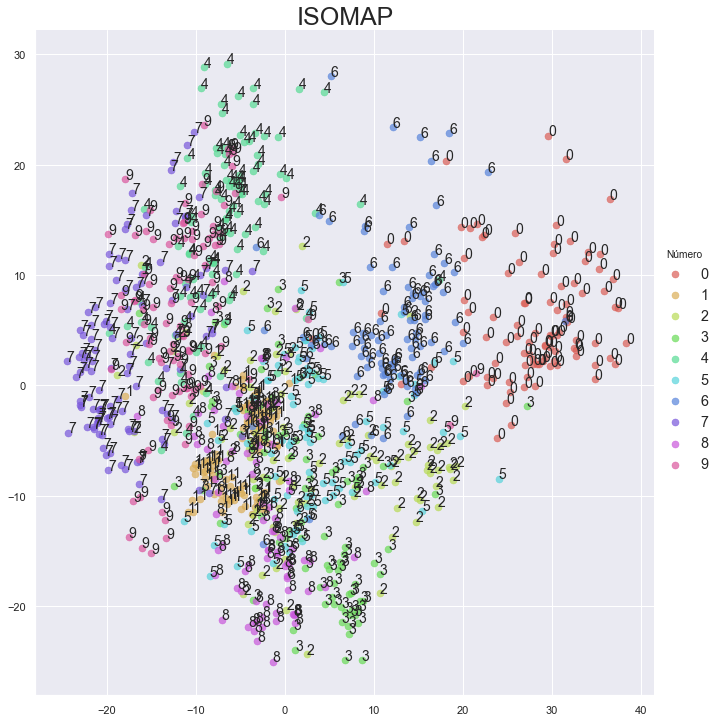

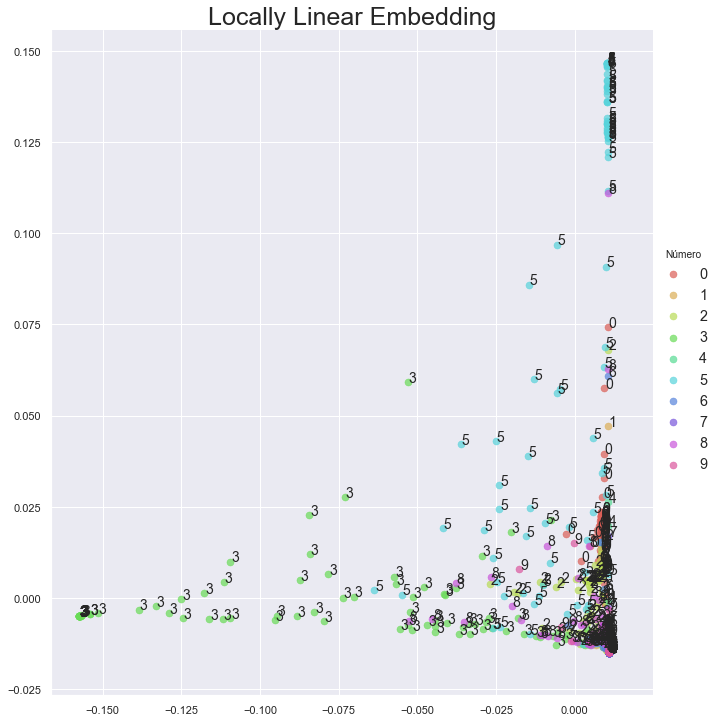

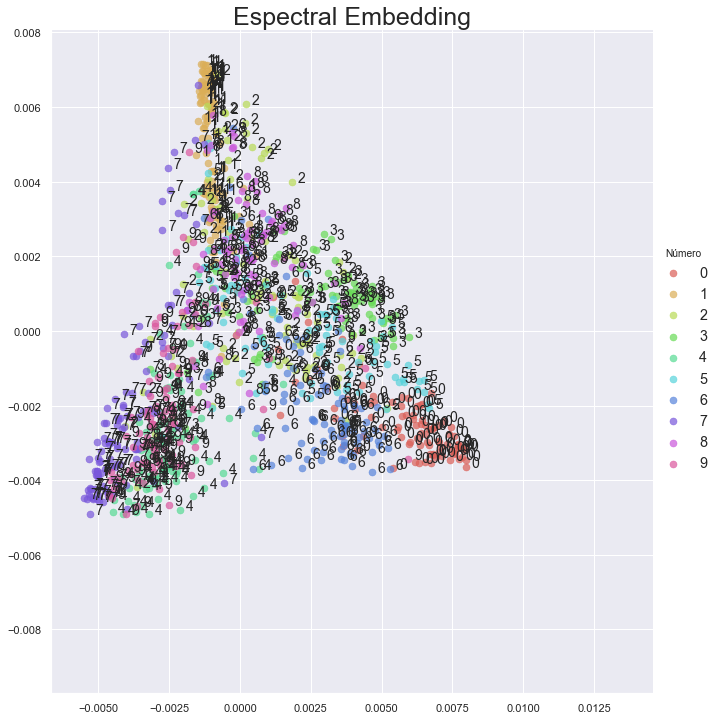

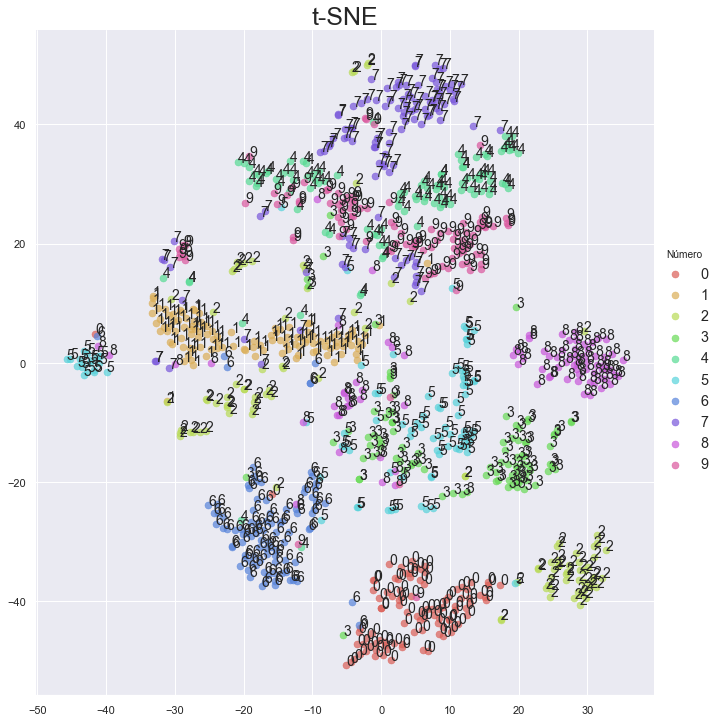

In [6]:
make_analysis(x_tra,y_train)

# Training a regressor 

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2)
X_transformed = embedding.fit_transform(x_tra)
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_tra,X_transformed)
X_test_trans=regr.predict(x_te)

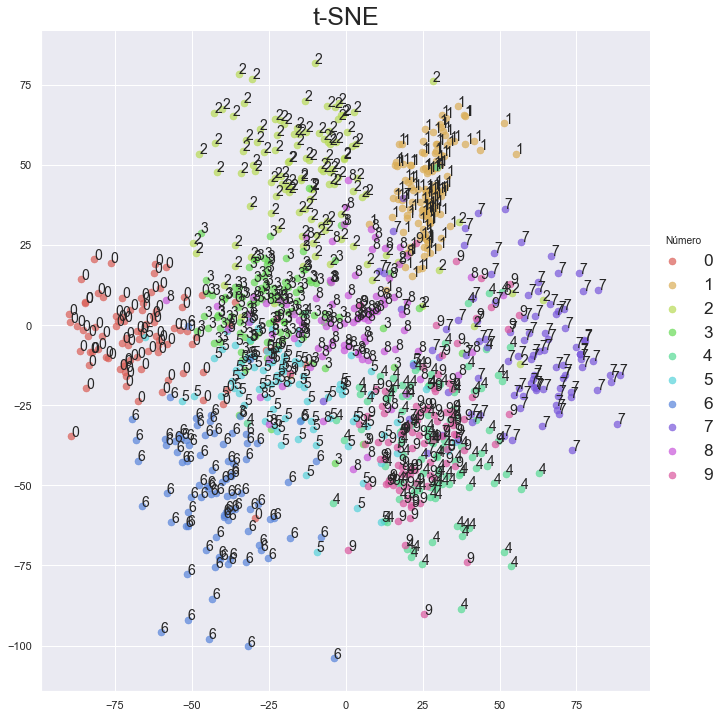

In [17]:
plot_mnist(X_test_trans,x_te,y_test,4)

In [18]:
regr.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Old trash from here

In [118]:
def plot_mnist(X_transformed,X_train,y_train):
    n_train=np.shape(y_train)[0]
    palette = np.array(sns.color_palette("hls", num_classes))
    d = {"x": X_transformed[:,0], 'y':X_transformed[:,1], "Class": y_train}
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(frameon=False)
    #snb.scatterplot(x='x', y='y', hue='Class',data=df,c=palette)
    ax.scatter(X_transformed[:,0], X_transformed[:,1], lw=0, s=40, c=palette[y_train.astype(np.int)])
    #plt.legend(loc="best", bbox_to_anchor=(1.2, 1), ncol=1)
    label_point(df.x, df.y, df.Class, plt.gca())  

## ISOMAP

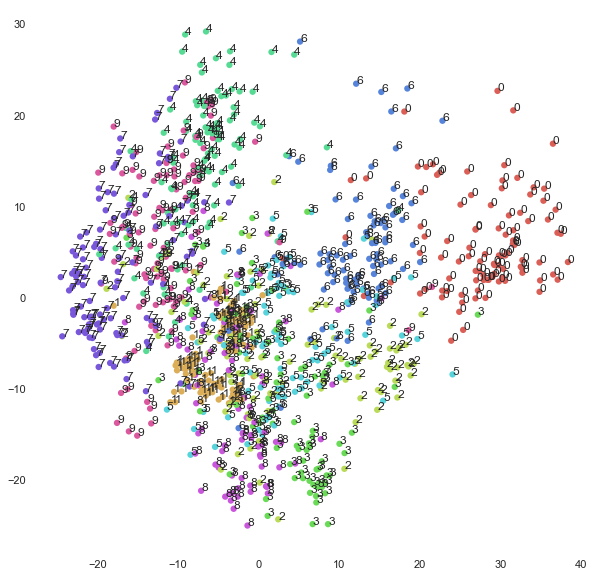

In [107]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(x_tra)

plot_mnist(X_transformed,x_tra,y_train)
#plot_mnist1(X_transformed,x_tra,y_train)

## Locally Linear Embedding

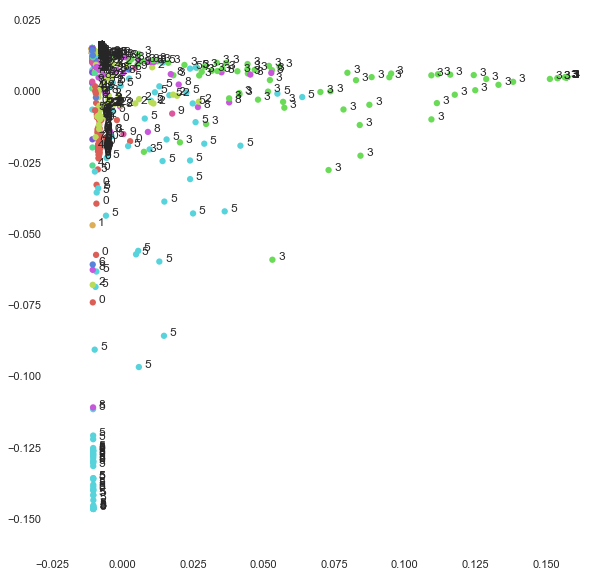

In [108]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(x_tra)
plot_mnist(X_transformed,x_tra,y_train)
#plot_mnist1(X_transformed,x_tra,y_train)

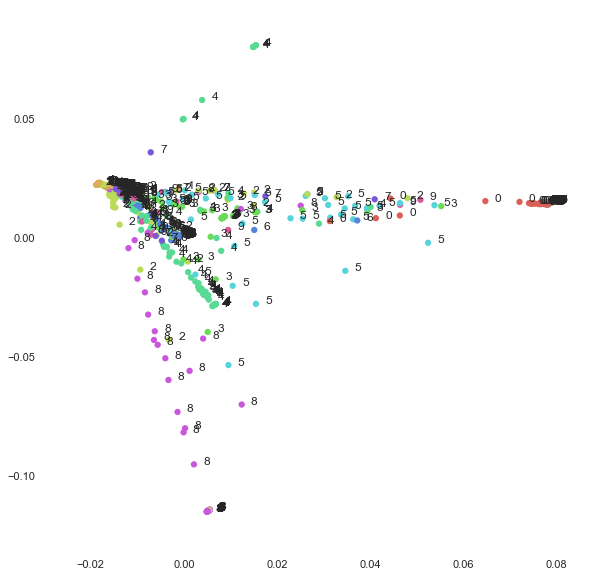

In [109]:
from sklearn.manifold import locally_linear_embedding as lle
X_transformed = lle(x_tra,3,n_components=2)
plot_mnist(X_transformed[0],x_tra,y_train)
#plot_mnist1(X_transformed[0],x_tra,y_train)

## MDS

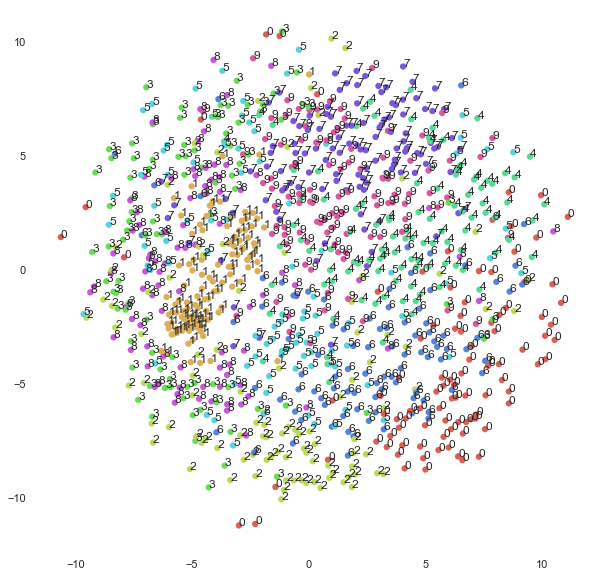

In [120]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(x_tra)
plot_mnist(X_transformed,x_tra,y_train)
#plot_mnist1(X_transformed,x_tra,y_train)

## Spectral Embedding

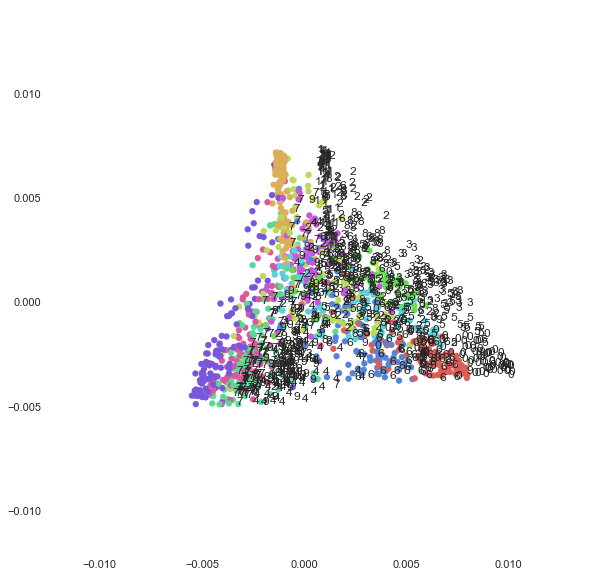

In [119]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2)
X_transformed = embedding.fit_transform(x_tra)
plot_mnist(X_transformed,x_tra,y_train)
#plot_mnist1(X_transformed,x_tra,y_train)

## t-SNE

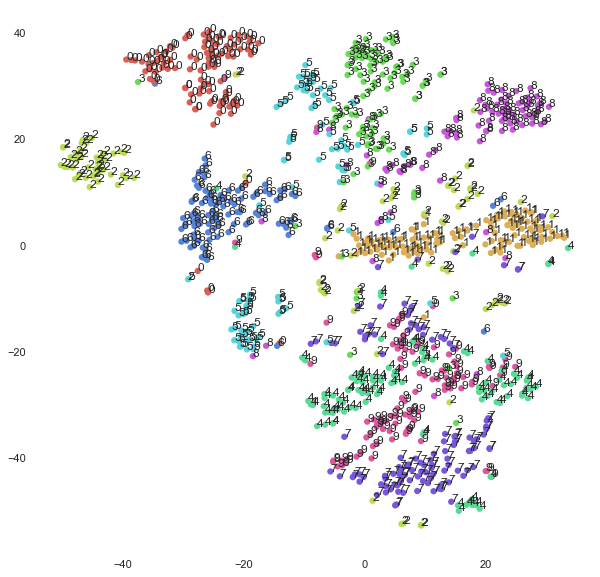

In [122]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2)
X_transformed = embedding.fit_transform(x_tra)
plot_mnist(X_transformed,x_tra,y_train)
#plot_mnist1(X_transformed,x_tra,y_train)

In [ ]:
titulo="PLot"
palette = np.array(sns.color_palette("hls", num_classes))
d = {"x": X_transformed[:,0], 'y':X_transformed[:,1], "Class": y_train}
df = pd.DataFrame(data=d)
g = sns.FacetGrid(df, hue="Class", palette=palette, height=10)
g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5)
g.add_legend(fontsize="x-large");
label_point(df.x, df.y, df.Class, plt.gca())
plt.title(titulo,fontsize=25)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

In [129]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.002, point['y'], int(point['val']),fontsize="large")


def plot_mnist1(X_transformed,X_train,y_train):
    n_train=np.shape(y_train)[0]
    palette = np.array(sns.color_palette("hls", num_classes))
    d = {"x": X_transformed[:,0], 'y':X_transformed[:,1], "Class": y_train}
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(frameon=False)
    snb.scatterplot(x='x', y='y', hue='Class',data=df,c=palette)
    plt.legend(loc="best", bbox_to_anchor=(1.2, 1), ncol=1)
    import random
    from matplotlib import offsetbox
    min_dist=20.0
    shown_images = np.array([[15., 15.]])
    indices = np.arange(X_transformed.shape[0])
    random.shuffle(indices)
    n_train=np.shape(y_train)[0]
    for i in indices[:n_train]:
        dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist:
            continue
        shown_images = np.r_[shown_images, [X_transformed[i]]]
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(X_train[i].reshape(28, 28),
                       cmap=plt.get_cmap('gray')),X_transformed[i])
        ax.add_artist(imagebox)
    ax.legend()